# Useful Pandas Code

## Install Packages and Useful Setup

### Importing Pandas

In [112]:
# import pandas
import pandas as pd
import numpy as np # very unusual to use pandas without NumPy

### Useful Setup Options

In [113]:
# This is necessary to show lots of columns
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

### Basics

Some might quibble over our usage of missing. By “missing” we simply mean NA (“not available”) or “not present for whatever reason”. Many data sets simply arrive with missing data, either because it exists and was not collected or it never existed. For example, in a collection of financial time series, some of the time series might start on different dates. Thus, values prior to the start date would generally be marked as missing.

As data comes in many shapes and forms, pandas aims to be flexible with regard to handling missing data. While NaN is the default missing value marker for reasons of computational speed and convenience, we need to be able to easily detect this value with data of different types: floating point, integer, boolean, and general object. In many cases, however, the Python None will arise and we wish to also consider that “missing” or “not available” or “NA”.

Note

If you want to consider inf and -inf to be “NA” in computations, you can set pandas.options.mode.use_inf_as_na = True.

To make detecting missing values easier (and across different array dtypes), pandas provides the isna() and notna() functions, which are also methods on Series and DataFrame objects:

In [241]:
df = pd.DataFrame(np.random.randn(5,3),index = ['a','c','e','f','h'],columns=['one','two','three'])
df2 = df.reindex(['a','b','c','d','e','f','g','h'])
df2

one       two     three
a  1.870768  0.671089  0.059307
b       NaN       NaN       NaN
c  1.062024  0.579408 -0.621839
d       NaN       NaN       NaN
e  0.049730  0.230010 -0.734483
f -0.936843 -2.468610  0.215013
g       NaN       NaN       NaN
h -0.369539  0.014487  0.114012

In [242]:
pd.isna(df2['one'])

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

In [243]:
pd.isna(df2)

one    two  three
a  False  False  False
b   True   True   True
c  False  False  False
d   True   True   True
e  False  False  False
f  False  False  False
g   True   True   True
h  False  False  False

### Datetimes

For datetime64[ns] types, NaT represents missing values. This is a pseudo-native sentinel value that can be represented by NumPy in a singular dtype (datetime64[ns]). pandas objects provide intercompatibility between NaT and NaN.

In [244]:
df2 = df.copy()
df2['timestamp'] = pd.Timestamp('20120101')
df2

one       two     three  timestamp
a  1.870768  0.671089  0.059307 2012-01-01
c  1.062024  0.579408 -0.621839 2012-01-01
e  0.049730  0.230010 -0.734483 2012-01-01
f -0.936843 -2.468610  0.215013 2012-01-01
h -0.369539  0.014487  0.114012 2012-01-01

In [245]:
df2.loc[['a','c'],['one','timestamp']] = np.nan
df2

one       two     three  timestamp
a       NaN  0.671089  0.059307        NaT
c       NaN  0.579408 -0.621839        NaT
e  0.049730  0.230010 -0.734483 2012-01-01
f -0.936843 -2.468610  0.215013 2012-01-01
h -0.369539  0.014487  0.114012 2012-01-01

### Inserting Missing Data

You can insert missing values by simply assigning to containers. The actual missing value used will be chosen based on the dtype.

For example, numeric containers will always use NaN regardless of the missing value type chosen:

In [246]:
s = pd.Series([1,2,3])
s

0    1
1    2
2    3
dtype: int64

In [247]:
s.iloc[0] = None
s

0    NaN
1    2.0
2    3.0
dtype: float64

### Calculations with missing data

Missing values propagate naturally through arithmetic operations between pandas objects.

In [248]:
a = pd.DataFrame(np.random.randn(5,2),index = ['a','c','e','f','h'],columns = ['one','two'])
b = pd.DataFrame(np.random.randn(5,3),index = ['a','c','e','f','h'],columns = ['one','two','three'])

In [249]:
a.loc[['a','c'],'one'] = np.nan
b.loc[['a','c','h'],'one'] = np.nan
a

one       two
a       NaN  0.684254
c       NaN  0.469929
e  0.014487  2.323193
f -2.733318  1.403093
h -0.688800 -1.597560

In [250]:
b

one       two     three
a       NaN  0.119940 -1.670044
c       NaN  0.321343  1.406295
e -0.747195 -0.404993 -0.029101
f -0.370780 -0.847870 -1.235201
h       NaN -1.097867 -0.696950

In [251]:
a+b

one  three       two
a       NaN    NaN  0.804194
c       NaN    NaN  0.791272
e -0.732708    NaN  1.918200
f -3.104098    NaN  0.555223
h       NaN    NaN -2.695427

The descriptive statistics and computational methods discussed in the data structure overview (and listed here and here) are all written to account for missing data. For example:

    When summing data, NA (missing) values will be treated as zero.
    If the data are all NA, the result will be 0.
    Cumulative methods like cumsum() and cumprod() ignore NA values by default, but preserve them in the resulting arrays. To override this behaviour and include NA values, use skipna=False.


The sum of an empty or all-NA Series or column of a DataFrame is 0.
The product of an empty or all-NA Series or column of a DataFrame is 1.
NA groups in GroupBy are automatically excluded. This behavior is consistent with R.

### Cleaning/Filling Missing Data

Filling missing values: fillna

fillna() can “fill in” NA values with non-NA data in a couple of ways, which we illustrate:

Replace NA with a scalar value

In [252]:
df2

one       two     three  timestamp
a       NaN  0.671089  0.059307        NaT
c       NaN  0.579408 -0.621839        NaT
e  0.049730  0.230010 -0.734483 2012-01-01
f -0.936843 -2.468610  0.215013 2012-01-01
h -0.369539  0.014487  0.114012 2012-01-01

In [253]:
df2.fillna(0)

one       two     three            timestamp
a  0.000000  0.671089  0.059307                    0
c  0.000000  0.579408 -0.621839                    0
e  0.049730  0.230010 -0.734483  2012-01-01 00:00:00
f -0.936843 -2.468610  0.215013  2012-01-01 00:00:00
h -0.369539  0.014487  0.114012  2012-01-01 00:00:00

In [254]:
a.fillna('missing')

one       two
a    missing  0.684254
c    missing  0.469929
e  0.0144866  2.323193
f   -2.73332  1.403093
h    -0.6888 -1.597560

Fill gaps forward or backward

Using the same filling arguments as reindexing, we can propagate non-NA values forward or backward:

In [255]:
b.fillna(method='pad')

one       two     three
a       NaN  0.119940 -1.670044
c       NaN  0.321343  1.406295
e -0.747195 -0.404993 -0.029101
f -0.370780 -0.847870 -1.235201
h -0.370780 -1.097867 -0.696950

To remind you, these are the available filling methods:

    Method 	Action
    pad / ffill 	Fill values forward
    bfill / backfill 	Fill values backward

With time series data, using pad/ffill is extremely common so that the “last known value” is available at every time point.

ffill() is equivalent to fillna(method='ffill') and bfill() is equivalent to fillna(method='bfill')

Filling with a PandasObject

You can also fillna using a dict or Series that is alignable. The labels of the dict or index of the Series must match the columns of the frame you wish to fill. The use case of this is to fill a DataFrame with the mean of that column.

In [256]:
dff = pd.DataFrame(np.random.randn(10,3), columns = list('abc'))

In [257]:
dff.iloc[3:5,0] = np.nan
dff.iloc[4:6,1] = np.nan
dff.iloc[5:7,2] = np.nan
dff

a         b         c
0  0.977582 -0.719877 -1.149413
1  0.974238 -0.059444 -0.468792
2 -0.789102 -0.288866  0.621423
3       NaN  0.702806  0.132927
4       NaN       NaN  0.265759
5  0.424695       NaN       NaN
6 -1.234282 -1.556465       NaN
7 -0.235548  0.005417 -0.776231
8 -0.566664 -0.680917 -0.077681
9 -0.541266  0.026712  0.032642

In [258]:
dff.fillna(dff.mean()['b':'c'])

a         b         c
0  0.977582 -0.719877 -1.149413
1  0.974238 -0.059444 -0.468792
2 -0.789102 -0.288866  0.621423
3       NaN  0.702806  0.132927
4       NaN -0.321329  0.265759
5  0.424695 -0.321329 -0.177421
6 -1.234282 -1.556465 -0.177421
7 -0.235548  0.005417 -0.776231
8 -0.566664 -0.680917 -0.077681
9 -0.541266  0.026712  0.032642

In [259]:
dff.where(pd.notna(dff),dff.mean(),axis=1)

a         b         c
0  0.977582 -0.719877 -1.149413
1  0.974238 -0.059444 -0.468792
2 -0.789102 -0.288866  0.621423
3 -0.123793  0.702806  0.132927
4 -0.123793 -0.321329  0.265759
5  0.424695 -0.321329 -0.177421
6 -1.234282 -1.556465 -0.177421
7 -0.235548  0.005417 -0.776231
8 -0.566664 -0.680917 -0.077681
9 -0.541266  0.026712  0.032642

Dropping axis labels with missing data: dropna

You may wish to simply exclude labels from a data set which refer to missing data. To do this, use dropna():

In [260]:
df['one'] = np.nan
df

one       two     three
a  NaN  0.671089  0.059307
c  NaN  0.579408 -0.621839
e  NaN  0.230010 -0.734483
f  NaN -2.468610  0.215013
h  NaN  0.014487  0.114012

In [261]:
df.dropna(axis=1)

two     three
a  0.671089  0.059307
c  0.579408 -0.621839
e  0.230010 -0.734483
f -2.468610  0.215013
h  0.014487  0.114012

Interpolation

Both Series and DataFrame objects have interpolate() that, by default, performs linear interpolation at missing datapoints.

In [262]:
df = pd.DataFrame({'A': [1, 2.1, np.nan, 4.7, 5.6, 6.8],
                    'B': [.25, np.nan, np.nan, 4, 12.2, 14.4]})
df

A      B
0  1.0   0.25
1  2.1    NaN
2  NaN    NaN
3  4.7   4.00
4  5.6  12.20
5  6.8  14.40

In [263]:
df.interpolate()

A      B
0  1.0   0.25
1  2.1   1.50
2  3.4   2.75
3  4.7   4.00
4  5.6  12.20
5  6.8  14.40

he method argument gives access to fancier interpolation methods. If you have scipy installed, you can pass the name of a 1-d interpolation routine to method. You’ll want to consult the full scipy interpolation documentation and reference guide for details. The appropriate interpolation method will depend on the type of data you are working with.

    If you are dealing with a time series that is growing at an increasing rate, method='quadratic' may be appropriate.
    If you have values approximating a cumulative distribution function, then method='pchip' should work well.
    To fill missing values with goal of smooth plotting, consider method='akima'.


Replacing Generic Values

Often times we want to replace arbitrary values with other values.

replace() in Series and replace() in DataFrame provides an efficient yet flexible way to perform such replacements.

For a Series, you can replace a single value or a list of values by another value:

In [264]:
ser = pd.Series([0.,1.,2.,3.,4.])
ser

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [265]:
ser.replace(0,5)

0    5.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

## Split-Apply-Combine

By “group by” we are referring to a process involving one or more of the following steps:

        Splitting the data into groups based on some criteria.
        Applying a function to each group independently.
        Combining the results into a data structure.

Out of these, the split step is the most straightforward. In fact, in many situations we may wish to split the data set into groups and do something with those groups. In the apply step, we might wish to one of the following:

        Aggregation: compute a summary statistic (or statistics) for each group. Some examples:

                Compute group sums or means.
                Compute group sizes / counts.

        Transformation: perform some group-specific computations and return a like-indexed object. Some examples:

                Standardize data (zscore) within a group.
                Filling NAs within groups with a value derived from each group.

        Filtration: discard some groups, according to a group-wise computation that evaluates True or False. Some examples:

                Discard data that belongs to groups with only a few members.
                Filter out data based on the group sum or mean.

        Some combination of the above: GroupBy will examine the results of the apply step and try to return a sensibly combined result if it doesn’t fit into either of the above two categories.

Since the set of object instance methods on pandas data structures are generally rich and expressive, we often simply want to invoke, say, a DataFrame function on each group. The name GroupBy should be quite familiar to those who have used a SQL-based tool (or itertools), in which you can write code like:

SELECT Column1, Column2, mean(Column3), sum(Column4)
FROM SomeTable
GROUP BY Column1, Column2

We aim to make operations like this natural and easy to express using pandas. We’ll address each area of GroupBy functionality then provide some non-trivial examples / use cases.

### Splitting an Object into Groups

pandas objects can be split on any of their axes. The abstract definition of grouping is to provide a mapping of labels to group names. To create a GroupBy object (more on what the GroupBy object is later), you may do the following:

default is axis=0
> grouped = obj.groupby(key)

> grouped = obj.groupby(key, axis=1)

> grouped = obj.groupby([key1, key2])

The mapping can be specified many different ways:

        A Python function, to be called on each of the axis labels.
        A list or NumPy array of the same length as the selected axis.
        A dict or Series, providing a label -> group name mapping.
        For DataFrame objects, a string indicating a column to be used to group. Of course df.groupby('A') is just syntactic sugar for df.groupby(df['A']), but it makes life simpler.
        For DataFrame objects, a string indicating an index level to be used to group.
        A list of any of the above things.

Collectively we refer to the grouping objects as the keys. For example, consider the following DataFrame:

In [266]:
df = pd.DataFrame({'A':['foo','bar','foo','bar','foo','bar','foo','foo'],
                  'B':['one','one','two','three','two','two','one','three'],
                  'C': np.random.randn(8),
                  'D': np.random.randn(8)})
df

A      B         C         D
0  foo    one  0.392647 -0.905606
1  bar    one -0.745486 -2.233136
2  foo    two -0.334792 -0.246920
3  bar  three -0.154136  2.115164
4  foo    two -0.836135 -1.894277
5  bar    two -0.315581  0.216264
6  foo    one  0.806208  0.138379
7  foo  three -0.054285  0.124915

In [267]:
grouped = df.groupby('A')

In [268]:
grouped = df.groupby(['A','B'])

In [269]:
grouped.describe()

C                                                                           D                                                                      
          count      mean       std       min       25%       50%       75%       max count      mean       std       min       25%       50%       75%       max
A   B                                                                                                                                                            
bar one     1.0 -0.745486       NaN -0.745486 -0.745486 -0.745486 -0.745486 -0.745486   1.0 -2.233136       NaN -2.233136 -2.233136 -2.233136 -2.233136 -2.233136
    three   1.0 -0.154136       NaN -0.154136 -0.154136 -0.154136 -0.154136 -0.154136   1.0  2.115164       NaN  2.115164  2.115164  2.115164  2.115164  2.115164
    two     1.0 -0.315581       NaN -0.315581 -0.315581 -0.315581 -0.315581 -0.315581   1.0  0.216264       NaN  0.216264  0.216264  0.216264  0.216264  0.216264
foo one     2.0  0.599427  0.292432  0.392647  0.496037  0.599427  0.702817  0.806208   2.0 -0.383614  0.738209 -0.905606 -0.644610 -0.383614 -0.122617  0.138379
    three   1.0 -0.054285       NaN -0.054285 -0.054285 -0.054285 -0.054285 -0.054285   1.0  0.124915       NaN  0.124915  0.124915  0.124915  0.124915  0.124915
    two     2.0 -0.585464  0.354503 -0.836135 -0.710799 -0.585464 -0.460128 -0.334792   2.0 -1.070599  1.164857 -1.894277 -1.482438 -1.070599 -0.658759 -0.246920

In [270]:
def get_letter_type(letter):
    if letter.lower() in 'aeiou':
        return 'vowel'
    else:
        return 'consonant'

In [271]:
grouped = df.groupby(get_letter_type,axis=1)

pandas Index objects support duplicate values. If a non-unique index is used as the group key in a groupby operation, all values for the same index value will be considered to be in one group and thus the output of aggregation functions will only contain unique index values:

### GroupBy Sorting

By default the group keys are sorted during the groupby operation. You may however pass sort=False for potential speedups:

In [272]:
df2 = pd.DataFrame({'X': ['B','B','A','A'], 'Y': [1,2,3,4]})
df2.groupby('X',sort=False).sum()

Y
X   
B  3
A  7

Note that groupby will preserve the order in which observations are sorted within each group. For example, the groups created by groupby() below are in the order they appeared in the original DataFrame:

### GroupBy Object Attributes

The groups attribute is a dict whose keys are the computed unique groups and corresponding values being the axis labels belonging to each group. In the above example we have:

In [273]:
df.groupby('A').groups

{'bar': Int64Index([1, 3, 5], dtype='int64'),
 'foo': Int64Index([0, 2, 4, 6, 7], dtype='int64')}

In [274]:
df.groupby(get_letter_type, axis=1).groups

{'consonant': Index(['B', 'C', 'D'], dtype='object'),
 'vowel': Index(['A'], dtype='object')}

In [275]:
grouped = df.groupby(['A','B'])
grouped.groups

{('bar', 'one'): Int64Index([1], dtype='int64'),
 ('bar', 'three'): Int64Index([3], dtype='int64'),
 ('bar', 'two'): Int64Index([5], dtype='int64'),
 ('foo', 'one'): Int64Index([0, 6], dtype='int64'),
 ('foo', 'three'): Int64Index([7], dtype='int64'),
 ('foo', 'two'): Int64Index([2, 4], dtype='int64')}

In [276]:
len(grouped)

6

###  Iterating Through Groups

With the GroupBy object in hand, iterating through the grouped data is very natural and functions similarly to itertools.groupby():

In [277]:
grouped = df.groupby('A')

In [278]:
for name, group in grouped:
    print(name)
    print(group)

bar
     A      B         C         D
1  bar    one -0.745486 -2.233136
3  bar  three -0.154136  2.115164
5  bar    two -0.315581  0.216264
foo
     A      B         C         D
0  foo    one  0.392647 -0.905606
2  foo    two -0.334792 -0.246920
4  foo    two -0.836135 -1.894277
6  foo    one  0.806208  0.138379
7  foo  three -0.054285  0.124915


### Aggregation

Once the GroupBy object has been created, several methods are available to perform a computation on the grouped data. These operations are similar to the aggregating API, window functions API, and resample API.

An obvious one is aggregation via the aggregate() or equivalently agg() method:

In [279]:
grouped.aggregate(np.sum)

C         D
A                      
bar -1.215204  0.098292
foo -0.026358 -2.783510

In [280]:
df.groupby('A').agg([np.sum,np.mean])

C                   D          
          sum      mean       sum      mean
A                                          
bar -1.215204 -0.405068  0.098292  0.032764
foo -0.026358 -0.005272 -2.783510 -0.556702

Another simple aggregation example is to compute the size of each group. This is included in GroupBy as the size method. It returns a Series whose index are the group names and whose values are the sizes of each group.

In [281]:
grouped.size()

A
bar    3
foo    5
dtype: int64

In [282]:
grouped.describe()

C                                                                           D                                                                      
    count      mean       std       min       25%       50%       75%       max count      mean       std       min       25%       50%       75%       max
A                                                                                                                                                          
bar   3.0 -0.405068  0.305662 -0.745486 -0.530534 -0.315581 -0.234859 -0.154136   3.0  0.032764  2.179950 -2.233136 -1.008436  0.216264  1.165714  2.115164
foo   5.0 -0.005272  0.636034 -0.836135 -0.334792 -0.054285  0.392647  0.806208   5.0 -0.556702  0.859439 -1.894277 -0.905606 -0.246920  0.124915  0.138379

Aggregating functions are the ones that reduce the dimension of the returned objects. Some common aggregating functions are tabulated below:

    Function 	Description
    mean() 	Compute mean of groups
    sum() 	Compute sum of group values
    size() 	Compute group sizes
    count() 	Compute count of group
    std() 	Standard deviation of groups
    var() 	Compute variance of groups
    sem() 	Standard error of the mean of groups
    describe() 	Generates descriptive statistics
    first() 	Compute first of group values
    last() 	Compute last of group values
    nth() 	Take nth value, or a subset if n is a list
    min() 	Compute min of group values
    max() 	Compute max of group values

The aggregating functions above will exclude NA values. Any function which reduces a Series to a scalar value is an aggregation function and will work, a trivial example is df.groupby('A').agg(lambda ser: 1). Note that nth() can act as a reducer or a filter, see here.

### Applying Multiple Functions at Once

With grouped Series you can also pass a list or dict of functions to do aggregation with, outputting a DataFrame:

In [283]:
grouped['C'].agg([np.sum,np.mean,np.std]).rename(columns={'sum':'SUM'})

SUM      mean       std
A                                
bar -1.215204 -0.405068  0.305662
foo -0.026358 -0.005272  0.636034

### Applying Different Functions to DataFrame Columns

By passing a dict to aggregate you can apply a different aggregation to the columns of a DataFrame:

In [284]:
grouped.agg({'C': np.mean,
            'D': lambda x: (np.std(x, ddof = 1))})

C         D
A                      
bar -0.405068  2.179950
foo -0.005272  0.859439

### Transformation

The transform method returns an object that is indexed the same (same size) as the one being grouped. The transform function must:

    Return a result that is either the same size as the group chunk or broadcastable to the size of the group chunk (e.g., a scalar, grouped.transform(lambda x: x.iloc[-1])).
    Operate column-by-column on the group chunk. The transform is applied to the first group chunk using chunk.apply.
    Not perform in-place operations on the group chunk. Group chunks should be treated as immutable, and changes to a group chunk may produce unexpected results. For example, when using fillna, inplace must be False (grouped.transform(lambda x: x.fillna(inplace=False))).
    (Optionally) operates on the entire group chunk. If this is supported, a fast path is used starting from the second chunk.

For example, suppose we wished to standardize the data within each group:

In [285]:
index = pd.date_range('10,1,1999',periods=1100)

In [286]:
ts = pd.Series(np.random.normal(0.5,2,1100),index)

In [287]:
ts = ts.rolling(window = 100, min_periods = 100).mean().dropna()

In [288]:
ts.head()

2000-01-08    0.617250
2000-01-09    0.596751
2000-01-10    0.603512
2000-01-11    0.611066
2000-01-12    0.627793
Freq: D, dtype: float64

In [289]:
key = lambda x: x.year

In [290]:
zscore = lambda x: (x - x.mean()) / x.std()

In [291]:
transformed = ts.groupby(key).transform(zscore)

We would expect the result to now have mean 0 and standard deviation 1 within each group, which we can easily check:

In [292]:
grouped = ts.groupby(key)

In [293]:
grouped.mean()

2000    0.395630
2001    0.390078
2002    0.290382
dtype: float64

In [294]:
grouped.std()

2000    0.182404
2001    0.136196
2002    0.083080
dtype: float64

In [295]:
grouped_trans = transformed.groupby(key)

In [296]:
grouped_trans.mean()

2000    3.667756e-16
2001    4.254968e-16
2002   -2.692391e-16
dtype: float64

In [297]:
grouped_trans.std()

2000    1.0
2001    1.0
2002    1.0
dtype: float64

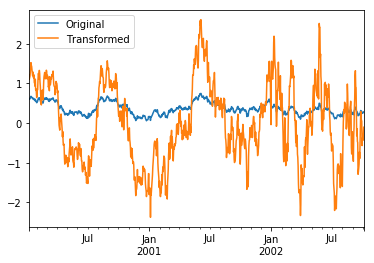

In [298]:
%matplotlib inline
compare = pd.DataFrame({'Original':ts,'Transformed':transformed})
compare.plot()

Transformation functions that have lower dimension outputs are broadcast to match the shape of the input array.

In [300]:
ts.groupby(lambda x: x.year).transform(lambda x: x.max() - x.min())

2000-01-08    0.624967
2000-01-09    0.624967
2000-01-10    0.624967
2000-01-11    0.624967
2000-01-12    0.624967
2000-01-13    0.624967
2000-01-14    0.624967
2000-01-15    0.624967
2000-01-16    0.624967
2000-01-17    0.624967
2000-01-18    0.624967
2000-01-19    0.624967
2000-01-20    0.624967
2000-01-21    0.624967
2000-01-22    0.624967
2000-01-23    0.624967
2000-01-24    0.624967
2000-01-25    0.624967
2000-01-26    0.624967
2000-01-27    0.624967
2000-01-28    0.624967
2000-01-29    0.624967
2000-01-30    0.624967
2000-01-31    0.624967
2000-02-01    0.624967
2000-02-02    0.624967
2000-02-03    0.624967
2000-02-04    0.624967
2000-02-05    0.624967
2000-02-06    0.624967
                ...   
2002-09-05    0.402777
2002-09-06    0.402777
2002-09-07    0.402777
2002-09-08    0.402777
2002-09-09    0.402777
2002-09-10    0.402777
2002-09-11    0.402777
2002-09-12    0.402777
2002-09-13    0.402777
2002-09-14    0.402777
2002-09-15    0.402777
2002-09-16    0.402777
2002-09-17 

### Filtration

The filter method returns a subset of the original object. Suppose we want to take only elements that belong to groups with a group sum greater than 2.

In [301]:
sf = pd.Series([1, 1, 2, 3, 3, 3])

In [302]:
sf.groupby(sf).filter(lambda x: x.sum() > 2)

3    3
4    3
5    3
dtype: int64

The argument of filter must be a function that, applied to the group as a whole, returns True or False.

Another useful operation is filtering out elements that belong to groups with only a couple members.

In [303]:
dff = pd.DataFrame({'A': np.arange(8), 'B': list('aabbbbcc')})

In [304]:
dff.groupby('B').filter(lambda x: len(x) > 2)

A  B
2  2  b
3  3  b
4  4  b
5  5  b

Alternatively, instead of dropping the offending groups, we can return a like-indexed objects where the groups that do not pass the filter are filled with NaNs.

In [305]:
dff.groupby('B').filter(lambda x: len(x) > 2, dropna=False)

A    B
0  NaN  NaN
1  NaN  NaN
2  2.0    b
3  3.0    b
4  4.0    b
5  5.0    b
6  NaN  NaN
7  NaN  NaN

For DataFrames with multiple columns, filters should explicitly specify a column as the filter criterion.

In [306]:
dff['C'] = np.arange(8)

In [307]:
dff.groupby('B').filter(lambda x: len(x['C']) > 2)

A  B  C
2  2  b  2
3  3  b  3
4  4  b  4
5  5  b  5

### Flexible Apply

Some operations on the grouped data might not fit into either the aggregate or transform categories. Or, you may simply want GroupBy to infer how to combine the results. For these, use the apply function, which can be substituted for both aggregate and transform in many standard use cases. However, apply can handle some exceptional use cases, for example:

In [308]:
df

A      B         C         D
0  foo    one  0.392647 -0.905606
1  bar    one -0.745486 -2.233136
2  foo    two -0.334792 -0.246920
3  bar  three -0.154136  2.115164
4  foo    two -0.836135 -1.894277
5  bar    two -0.315581  0.216264
6  foo    one  0.806208  0.138379
7  foo  three -0.054285  0.124915

In [309]:
grouped = df.groupby('A')
grouped['C'].apply(lambda x: x.describe())

A         
bar  count    3.000000
     mean    -0.405068
     std      0.305662
     min     -0.745486
     25%     -0.530534
     50%     -0.315581
     75%     -0.234859
     max     -0.154136
foo  count    5.000000
     mean    -0.005272
     std      0.636034
     min     -0.836135
     25%     -0.334792
     50%     -0.054285
     75%      0.392647
     max      0.806208
Name: C, dtype: float64

In [311]:
grouped = df.groupby('A')['C']
def f(group):
   return pd.DataFrame({'original': group,
                          'demeaned': group - group.mean()})

In [312]:
grouped.apply(f)

original  demeaned
0  0.392647  0.397918
1 -0.745486 -0.340418
2 -0.334792 -0.329521
3 -0.154136  0.250931
4 -0.836135 -0.830864
5 -0.315581  0.089486
6  0.806208  0.811479
7 -0.054285 -0.049013

apply on a Series can operate on a returned value from the applied function, that is itself a series, and possibly upcast the result to a DataFrame:

In [313]:
def f(x):
   return pd.Series([x, x ** 2], index=['x', 'x^2'])

In [314]:
s = pd.Series(np.random.rand(5))
s.apply(f)

x       x^2
0  0.789872  0.623898
1  0.668460  0.446839
2  0.194263  0.037738
3  0.979768  0.959944
4  0.587845  0.345562

### Plotting

Groupby also works with some plotting methods. For example, suppose we suspect that some features in a DataFrame may differ by group, in this case, the values in column 1 where the group is “B” are 3 higher on average.

In [315]:
np.random.seed(1234)

In [316]:
df = pd.DataFrame(np.random.randn(50, 2))
df['g'] = np.random.choice(['A', 'B'], size=50)

In [317]:
df.loc[df['g'] == 'B', 1] += 3

A         AxesSubplot(0.1,0.15;0.363636x0.75)
B    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

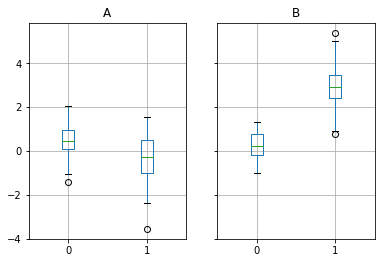

In [318]:
df.groupby('g').boxplot()

### Advanced GroupBy Example

dftypegroup = df[['type1','weight_kg']].groupby('type1').agg({'weight_kg':[len,max, min,maxx,percentile25,percentile75,lambda x: max(x)-min(x)]})